# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing necessary libraries and data

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.2.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3

In [ ]:
#libraries to read and manipulate data
import numpy as np
import pandas as pd

#libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

#libraries for model building and tuning
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (BaggingClassifier,RandomForestClassifier,
                              GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier)
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#libraries for metrics and statistics
from sklearn import metrics
import scipy.stats as stats
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

##Reading the dataset


In [ ]:
#Loading dataset
data=pd.read_csv("EasyVisa.csv")

## Data Overview

- Observations
- Sanity checks

In [ ]:
#View the first 5 rows of the dataset
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
#Check data type and not null values for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
data.shape

(25480, 12)

In [ ]:
data.isna().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


-  There are 25480 rows and 12 columns in the data set
- There are no missing values in the data set.
- Number of employees, years of establishment & prevailing wages are of type integer or float.

In [ ]:
#Summary of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


- The average number of employees in the employer's organization are 5667 while the median number of employees in the employer's organization are 2109. This implies the attribute has a right skewed distribution with several positive outliers.
- The minimum number is negative which does not appear to be a valid data point
- Companies founded from 1800 to 2016 may introduce historical biases.
- The average wage (USD 74,455) exceeding the median (USD 70,308) also implies right skewness, again indicating outliers may be present
- The minimum wage value of USD 2.1367 is likely erroneous and should be investigated. Ensuring valid data points is crucial for accurate analysis.
- Analyzing the unit_of_wage alongside wage data could provide clearer insights into wage structures and trends across different companies and sectors

In [ ]:
#Number of unique values in each column
data.nunique()

,0
case_id,25480
continent,6
education_of_employee,4
has_job_experience,2
requires_job_training,2
no_of_employees,7105
yr_of_estab,199
region_of_employment,5
prevailing_wage,25454
unit_of_wage,4


The case ID column can be dropped as it is a unique ID variable and is not expected to add any value to the status of a visa being accepted

In [ ]:
data.drop(['case_id'],axis=1,inplace=True)

In [ ]:
data[data.duplicated()].count()

,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0
full_time_position,0


In [ ]:
#Converting all datatypes of object to category to reduce memory usage
cols = data.select_dtypes(['object'])
cols.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [ ]:
for i in cols.columns:
    data[i] = data[i].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 797.7 KB


In [ ]:
#Number of observations in each category
cat_cols=['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status']

for column in cat_cols:
    print(data[column].value_counts())
    print('-'*30)

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
------------------------------
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
------------------------------
Y    22773
N     2707
Name: full_time_position, dtype: int64
------------------------------
Certified    17018
Denied        8462
Name: case_status, dtype: int64
---------

In [ ]:
df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

In [ ]:
# function to create labeled barplots

def labeled_barplot(data, feature, feature_2, order, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    feature_2: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    ax = sns.countplot(
        data=data,
        x=feature,
        palette='pastel',
        order=order,
        hue=feature_2,
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=9,
            xytext=(0, 5),
            textcoords="offset points"
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize=(10, 5), kde=False, bins=None, hue=None):
    """
    Combines boxplot and histogram

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (16,6))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True,
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter",
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5), cmap='viridis')
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?**

In [ ]:
data['education_of_employee'].value_counts()

,education_of_employee
Bachelor's,10234
Master's,9634
High School,3420
Doctorate,2192


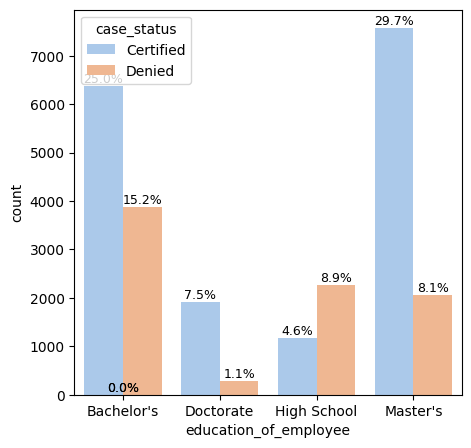

In [ ]:
#create a plot of the data above, but additionally with the percent of each group within the total number of cases
labeled_barplot(df,'education_of_employee','case_status', order=None, perc=True)

- Majority of the applicants have either bachelor's degrees or master's degrees
- Also the percentage of applications being certified versus denied increases considerably as an applicant's highest level of education achieved increases

In [ ]:
df['continent'].value_counts(normalize=True)*100

,continent
Asia,66.173469
Europe,14.646782
North America,12.919937
South America,3.343799
Africa,2.162480
Oceania,0.753532


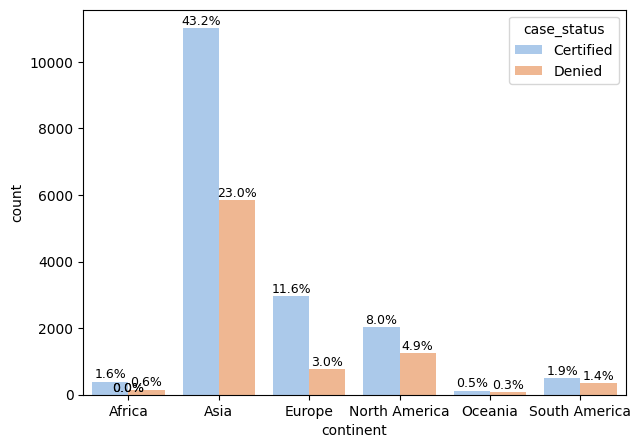

In [ ]:
labeled_barplot(df,'continent','case_status', order=None, perc=True)

 - The majority (66%) of the visa applicants are from Asia
 - The lowest fraction (<1%) of the applicants are from Oceania
 - Highest % of cases certified os also from Asia


**3.Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?**

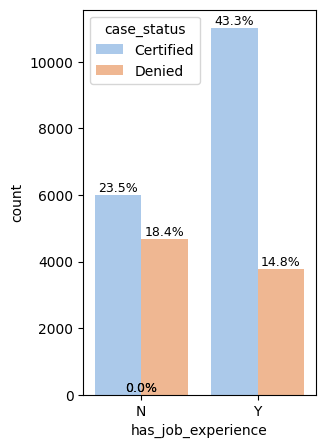

In [ ]:
labeled_barplot(df,'has_job_experience','case_status', order=None, perc=True)

- Yes work experience influence visa status.  
- Pecentage of certified case status is more for experience professionals.

**4.In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?**

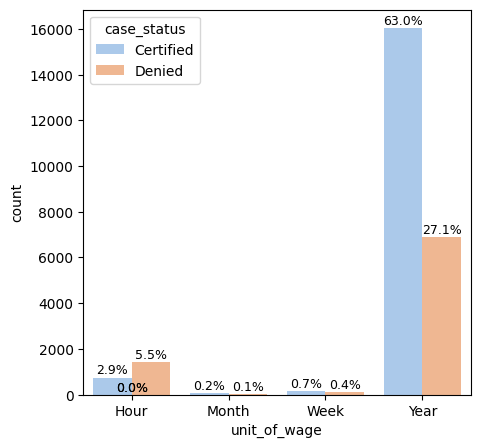

In [ ]:
labeled_barplot(df,'unit_of_wage','case_status', order=None, perc=True)

- Applicatins with yearly pay have the highest number of certified visa status.

**5.The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?**

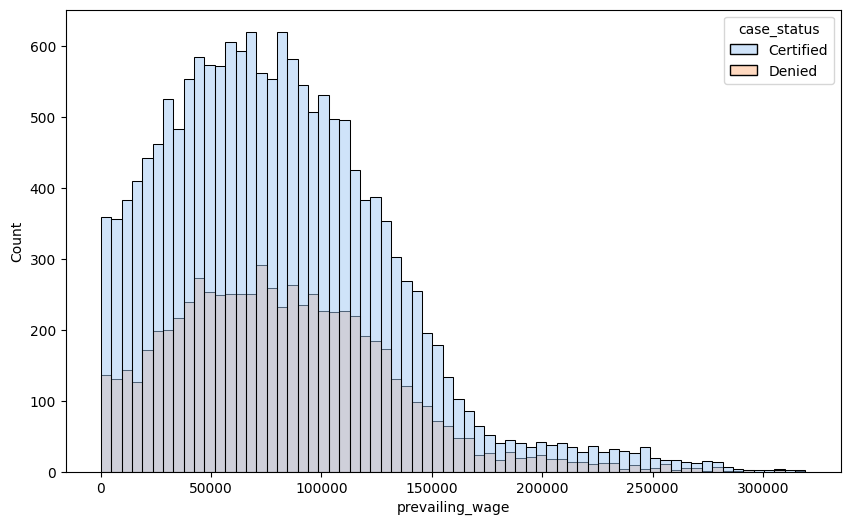

In [ ]:
#create a new dataframe of only those applicants applying for jobs with annual salaries (i.e., not 'Hour')
df_annual = df[df.unit_of_wage != "Hour"]
#show the distribution of annual salaries, along with ratio of *case_status* within each bin
plt.figure(figsize=(10,6))
sns.histplot(data=df_annual, x='prevailing_wage', hue='case_status',palette='pastel')
plt.show()

 - The distribution of wages is (as expected) right skewed, indicating a long-tail of jobs with annual salaries above 150,000 dollars.
 - As the distribution above shows, the ratio of approved to denied applications remains approximately equivalent across the range of wages.

In [ ]:
#create bins to categorize a job by its annual salary, which indicates how well paying the job is
bins = [0,25000,50000,75000,100000,125000,np.inf]
names = ['$0-25k','$25k-50k','$50k-75k','$75k-100k','$100k-125k','$125k+']
#assign an applicant to a category
df_annual['income_per_year'] = pd.cut(df_annual['prevailing_wage'], bins, labels=names)
df_annual.groupby('income_per_year')['case_status'].value_counts()

income_per_year  case_status
$0-25k           Certified      2090
                 Denied          761
$25k-50k         Certified      2839
                 Denied         1237
$50k-75k         Certified      3133
                 Denied         1372
$75k-100k        Certified      3014
                 Denied         1318
$100k-125k       Certified      2410
                 Denied         1138
$125k+           Certified      2785
                 Denied         1226
Name: case_status, dtype: int64

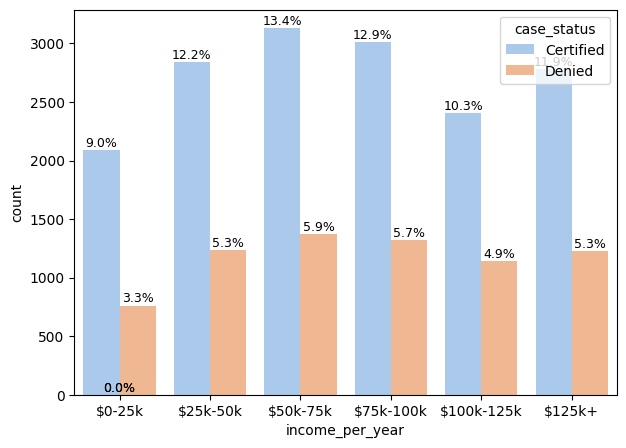

In [ ]:
labeled_barplot(df_annual,'income_per_year','case_status',perc=True,order=None)


- In support of the observation above, there does not appear to be a significant change in ratio of approved to denied applications as income_per_year increases.
- To the contrary, the ratio may actually decrease as this prevailing_wage increases.
- For applications for jobs with an income_per_year wage, the highest concentration of applications is for jobs with 50,000 to 75,000 dollars per year in salary.

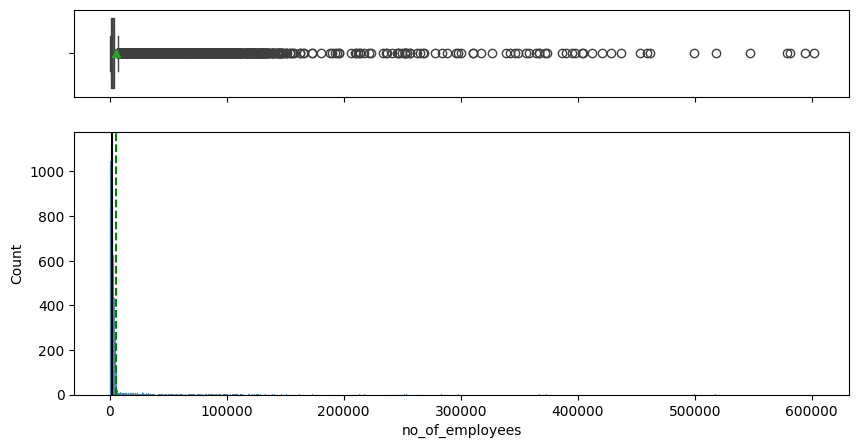

In [ ]:
#provide histogram and boxplots
histogram_boxplot(df, 'no_of_employees')

The data and graphs above, indicate the distribution of companies by number of employee is heavily right skewed, but without any outlier values that require further investigation or treatmen

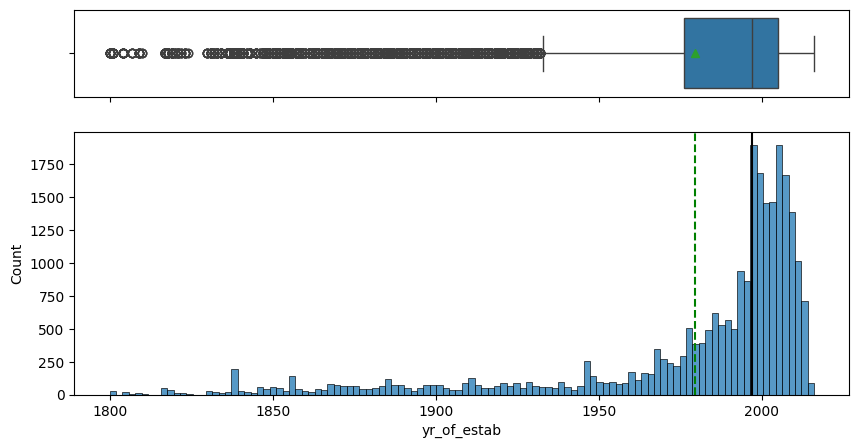

In [ ]:
histogram_boxplot(df, 'yr_of_estab')

The data and graphs above, indicate the distribution of companies by year of establishment (i.e., founding) is heavily left skewed, but without any outlier values which require further investigation or treatment.v

**Bivariate Analysis**

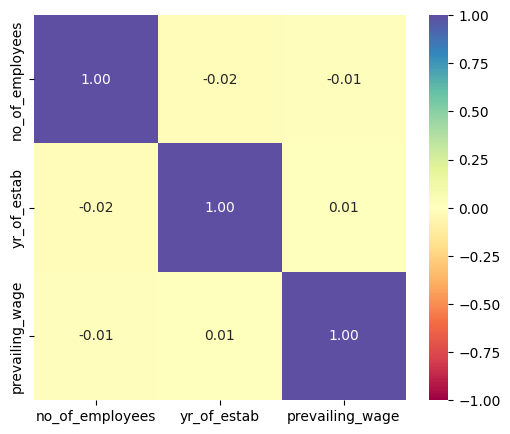

In [ ]:
# seperate the numerical values
cols_list = data.select_dtypes(include=np.number).columns.tolist()

# create the correlation matrix
plt.figure(figsize=(6, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

we cannot see any correlation between the numerical variables

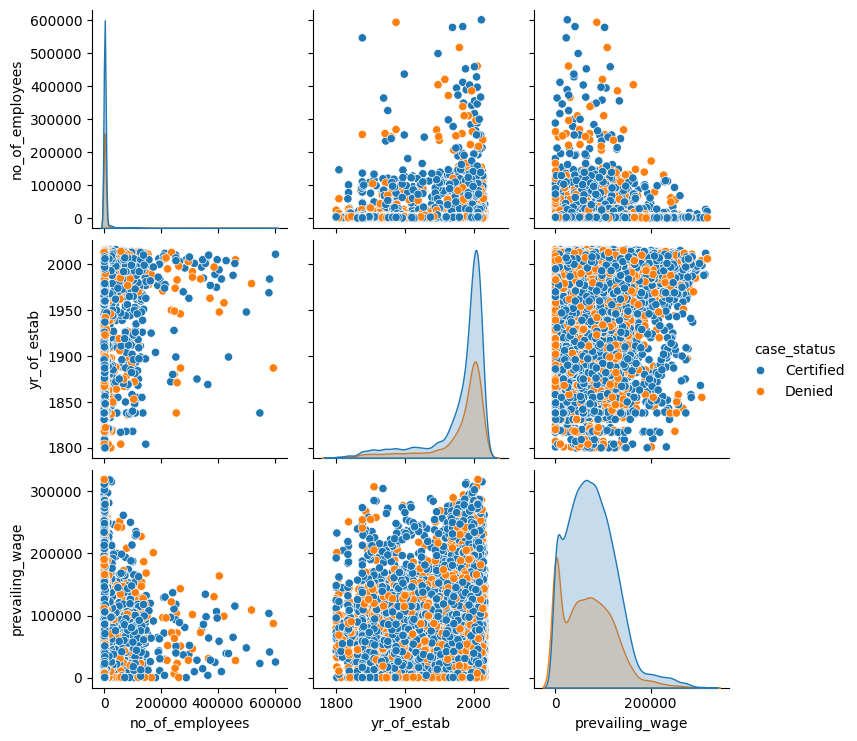

In [ ]:
# Add case_status to list of column names including numeric data
cols_list = cols_list + ["case_status"]

# Create a pairplot to see distributions of and relationships between variations of numeric data
sns.pairplot(data=df[cols_list], hue="case_status", diag_kind="kde", aspect=1)

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


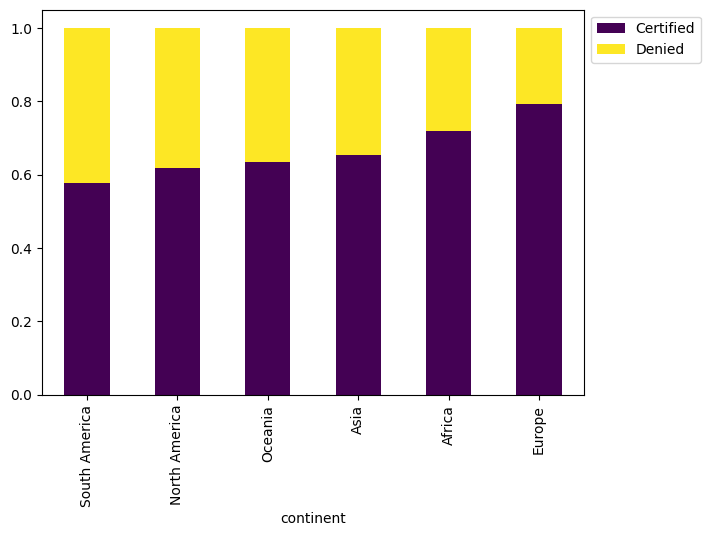

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


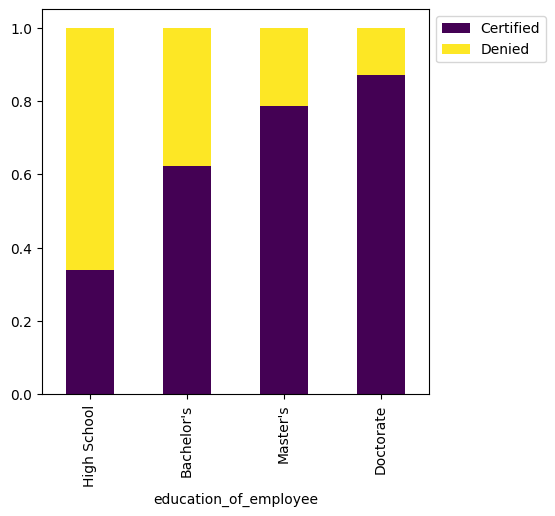

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


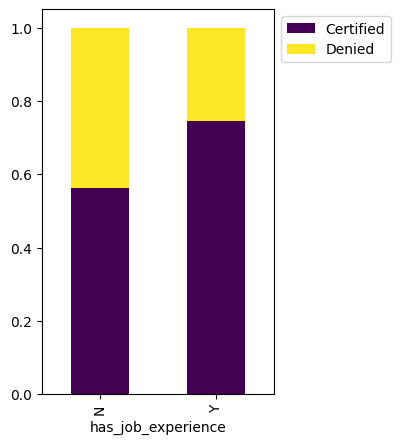

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


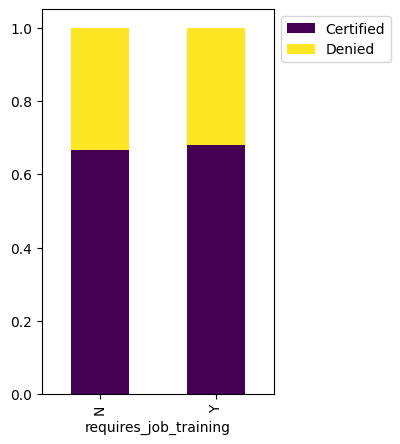

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


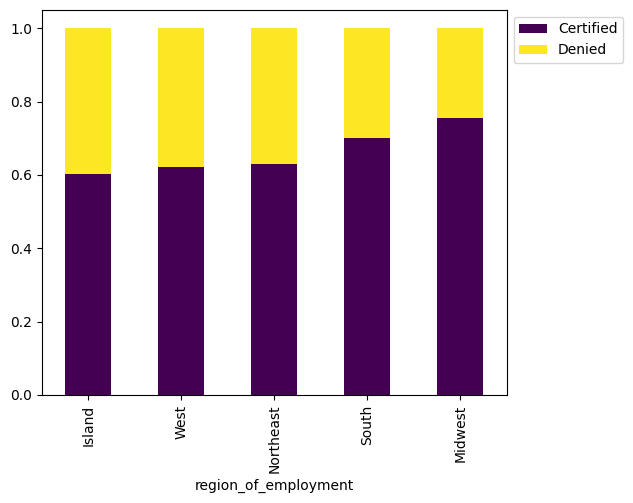

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


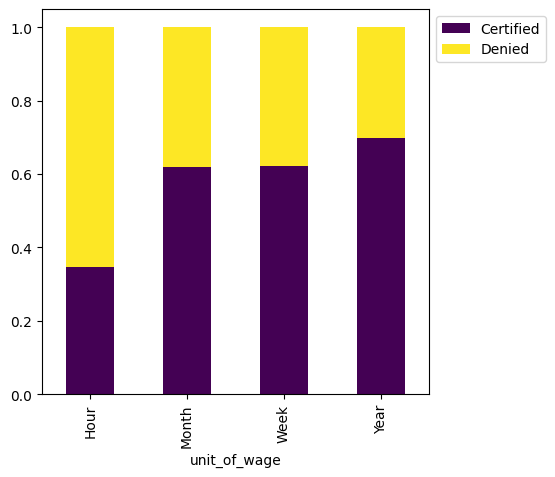

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


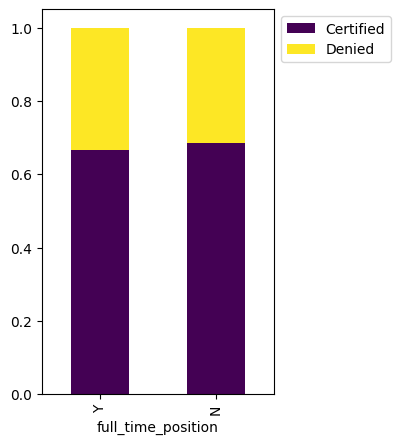

case_status  Certified  Denied    All
case_status                          
Denied               0    8462   8462
All              17018    8462  25480
Certified        17018       0  17018
------------------------------------------------------------------------------------------------------------------------


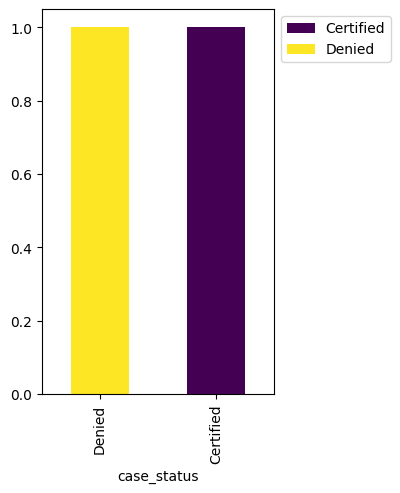

In [ ]:
cols_cat = df.select_dtypes(['category'])
for i in cols_cat.columns:
    stacked_barplot(df, i,"case_status")

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


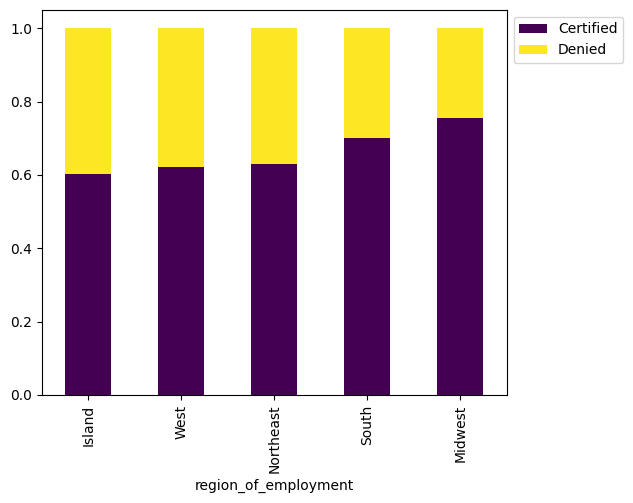

In [ ]:
stacked_barplot(
    data=df,
    predictor="region_of_employment",
    target="case_status"
)

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**Treatment of Missing Values**

Based on the initial evaluations, no values were missing in any of the columns. However, there were rows negative values of no_of_employees. To address this problem, these values are replaced with the median of no_of_employees

In [ ]:
neg_employee_no_rows = df['no_of_employees'] <= 0
df.loc[neg_employee_no_rows, 'no_of_employees'] = df['no_of_employees'].median()
df['no_of_employees'].describe()

,no_of_employees
count,25480.000000
mean,5669.797645
std,22877.372247
min,12.000000
25%,1028.000000
50%,2109.000000
75%,3504.000000
max,602069.000000


The new minimum number of employees is 12.

**Outlier detection**

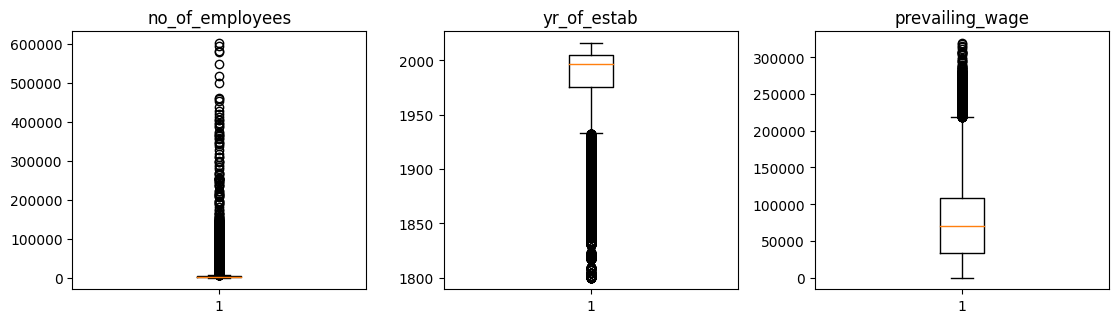

In [ ]:

numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Although there are outliers, we will keep them as they have a valuable input

**Preparing data for modeling**

In [ ]:
#drop the int_64 columns from the dataframe, since this information is captured through the features engineered above
df_model = df.drop(labels=['no_of_employees','yr_of_estab'], axis=1, inplace=True)

In [ ]:
#Encoding Certified as 1 and Denied as 0, as the OFLC wants to identify those visa applicants who are predicted to be approved.
df["case_status"] = df["case_status"].apply(lambda x: 1 if x == "Certified" else 0)


**Spliting the data into train and test sets**


In [ ]:
#create a dataframe of the predictor feature columns
X = df.drop('case_status',axis=1)
#create a datafrane of the predicted class (1=True, 0=False)
Y = df['case_status']

#generate dummy variables for each categorical variable
X = pd.get_dummies(X, drop_first=True)

#split the data into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [ ]:
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True)*100)
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True)*100)

Shape of Training set :  (17836, 19)
Shape of test set :  (7644, 19)
Percentage of classes in training set:
1    66.36017
0    33.63983
Name: case_status, dtype: float64
Percentage of classes in test set:
1    67.791732
0    32.208268
Name: case_status, dtype: float64


## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
x_train.head()

,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
18177,50739.740,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1
20291,127247.750,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1
21717,349.994,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
6351,45798.750,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,0,1,1
7312,90318.460,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1


## Building bagging and boosting models

**Model evaluation criterion**

**Model can make wrong predictions as:**

Predicting an applicant should be approved the applicant is denied.
Predicting an applicant should be denied and the applicant is approved.

**Which case is more important?**

Both are important
If an applicant is approved when they would have been denied, an unqualified employee will get a job that should have been filled by a US citizen.
If an applicant is denied when they should have been approved, U.S. companies will not be able to fill critical positions and the overall economy will not be as productive.

**How to reduce the losses?**

As the process of reviewing each application is time and resource-intensive, this model should identify those candidates predicted to be approved, so agents can prioritize these applications.
F1 Score can be used a the metric for evaluation of the model, as the greater the F1 score, the higher the chances of minimizing False Negatives and False Positives.
We will use balanced class weights, where applicable, so that model focuses equally on both classes

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[]

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_r2=metrics.r2_score(y_train,pred_train)
    test_r2=metrics.r2_score(y_test,pred_test)
    train_rmse=np.sqrt(metrics.mean_squared_error(y_train,pred_train))
    test_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_test))

    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))

    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True:
        print("R-sqaure on training set : ",metrics.r2_score(y_train,pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test,pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))

    # returning the list with train and test scores
    return score_list

In [ ]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

###Decision Tree Model

In [ ]:
dtree = DecisionTreeClassifier(criterion='gini', random_state=1, class_weight='balanced')
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, x_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, x_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.661041  0.746044   0.751994  0.749007


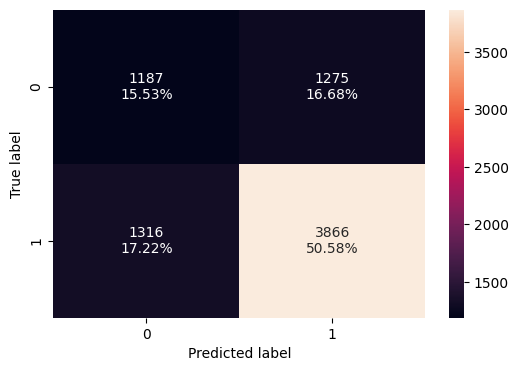

In [ ]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(dtree, x_test, y_test)

The Decision Tree is working well on the training data, but is not able to generalize well on the test data, indicating the model is overfit.

###Tuning Decision Tree

In [ ]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(5,30,5),
              'min_samples_leaf': [3, 5, 7],
              'max_leaf_nodes' : [2, 4, 6],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=4,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

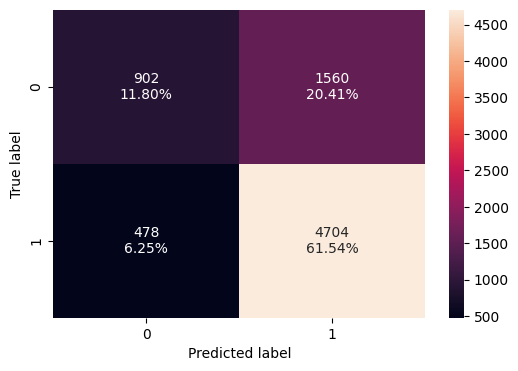

In [ ]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(dtree_estimator, x_test,y_test)

In [ ]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, x_train,y_train)
print("Training performance \n",dtree_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.725275  0.908837   0.737893  0.814492


In [ ]:
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, x_test, y_test)
print("Testing performance \n",dtree_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.733386  0.907758   0.750958  0.821947


###Feature Importances of Desiscion Tree

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(dtree_estimator.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_High School  0.549345
has_job_experience_Y               0.317252
unit_of_wage_Year                  0.133403
requires_job_training_Y            0.000000
unit_of_wage_Week                  0.000000
unit_of_wage_Month                 0.000000
region_of_employment_West          0.000000
region_of_employment_South         0.000000
region_of_employment_Northeast     0.000000
region_of_employment_Midwest       0.000000
prevailing_wage                    0.000000
continent_Asia                     0.000000
education_of_employee_Master's     0.000000
education_of_employee_Doctorate    0.000000
continent_South America            0.000000
continent_Oceania                  0.000000
continent_North America            0.000000
continent_Europe                   0.000000
full_time_position_Y               0.000000


- The Decision Tree model after tuning performs equally well on the training and testing datasets, indicating that the model is not overfit.
- Additionally, this model performs as well as two out of the three boosting models above on the test data.
- Both of these indicate this tuned model is a significant improvements over the base model.

###Bagging Classifier

In [ ]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(x_train,y_train)

BaggingClassifier(random_state=1)

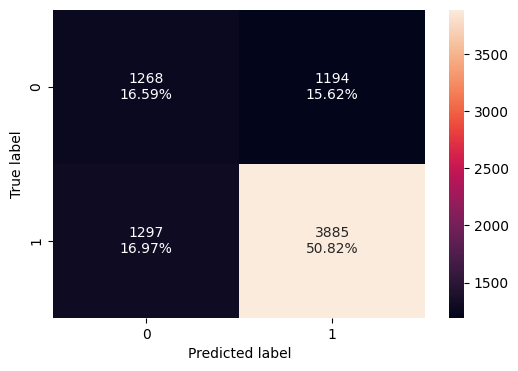

In [ ]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(bagging, x_test, y_test)

In [ ]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, x_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.974153  0.976512   0.984414  0.980447


In [ ]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, x_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.674123  0.749711   0.764914  0.757236


Similar to the Decision Tree model, this bagging classifer is overfit to the training dataset but has a higher F1 score.

###Tuning Bagging Classifier

Hyperparameters available for bagging classifier include:

- base_estimator: The base estimator to fit on random subsets of the dataset. If None(default), then the base estimator is a decision tree.
- n_estimators: The number of trees in the forest, default = 100.
max_features: The number of features to consider when looking for the best split.
- bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.
- bootstrap_features: If it is true, then features are drawn with replacement. Default value is False.
- max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.
- oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

In [ ]:
# random search for bagging classifier
parameters = {'max_samples': [0.7,0.8,0.9,1],
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : np.arange(50, 100, 10)
             }

#run the randomized search
rand_bag = RandomizedSearchCV(BaggingClassifier(random_state=1,bootstrap=True),
                              parameters, scoring = 'f1', cv = 5, random_state=1)
rand_bag = rand_bag.fit(x_train, y_train)

# Set the clf to the best combination of parameters
bag_tuned = rand_bag.best_estimator_

# Fit the best algorithm to the data
bag_tuned.fit(x_train, y_train)

BaggingClassifier(max_features=1, max_samples=0.7, n_estimators=80,
                  random_state=1)

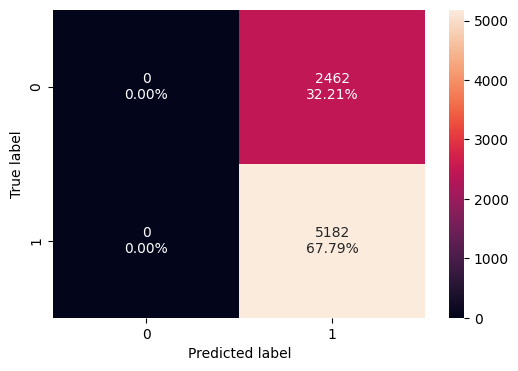

In [ ]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(bag_tuned, x_test,y_test)

In [ ]:
bagging_estimator_model_train_perf=model_performance_classification_sklearn(bag_tuned, x_train,y_train)
print("Training performance \n",bagging_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision        F1
0  0.663602     1.0   0.663602  0.797789


In [ ]:
bagging_estimator_model_test_perf=model_performance_classification_sklearn(bag_tuned, x_test, y_test)
print("Testing performance \n",bagging_estimator_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision        F1
0  0.677917     1.0   0.677917  0.808046


The Bagging Classifier after tuning performs far less well on the test data than on the training data, indicating that the model is still overfit.
However, this model does perform better than the base model.

###Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=1)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

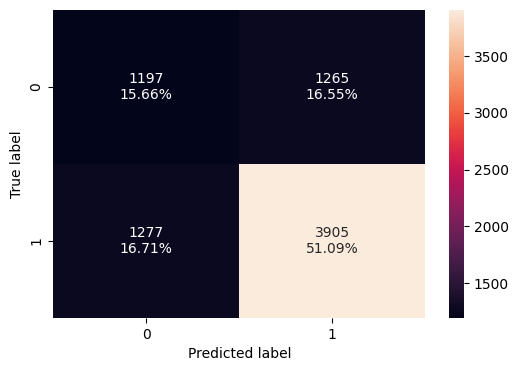

In [ ]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(rf,x_test,y_test)

In [ ]:
rf_model_train_perf=model_performance_classification_sklearn(rf,x_train,y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0   0.99972  0.999831   0.999747  0.999789


In [ ]:
rf_model_test_perf=model_performance_classification_sklearn(rf,x_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy   Recall  Precision        F1
0  0.667452  0.75357   0.755319  0.754444


Similar to the models above, this Random Forest is also overfit to the training dataset but has the highest F1 score so far.

###Tuning Random Forest

Hyperparameters for Random Forest include:
- n_estimators: The number of trees in the forest, default = 100.

- max_features: The number of features to consider when looking for the best split.

- class_weight: Weights associated with classes in the form {class_label: weight}.If not given, all classes are supposed to have weight one.

- For example: If the frequency of class 0 is 80% and the frequency of class 1 is 20% in the data, then class 0 will become the dominant class and the model will become biased toward the dominant classes. In this case, we can pass a dictionary {0:0.2,1:0.8} to the model to specify the weight of each class and the random forest will give more weightage to class 1.

- bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.

- max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.

- oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

- Note: A lot of hyperparameters of Decision Trees are also available to tune Random Forest like max_depth, min_sample_split etc.

In [ ]:
# Choose the type of classifier.
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": np.arange(10, 40, 10),
              "min_samples_leaf": np.arange(5, 10),
              "min_samples_split": [3, 5, 7],
              "max_features": ["sqrt", "log2"],
              "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Run the randomized search
rand_rf = RandomizedSearchCV(rf_estimator, parameters, scoring='f1', cv=5, n_jobs=-1, random_state=1)
rand_rf = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = rand_rf.best_estimator_

# Fit the best algorithm to the data.
rf_estimator.fit(x_train, y_train)# Choose the type of classifier.
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": np.arange(10, 40, 10),
              "min_samples_leaf": np.arange(5, 10),
              "min_samples_split": [3, 5, 7],
              "max_features": ["sqrt", "log2"],
              "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Run the randomized search
rand_rf = RandomizedSearchCV(rf_estimator, parameters, scoring='f1', cv=5, n_jobs=-1, random_state=1)
rand_rf = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = rand_rf.best_estimator_

# Fit the best algorithm to the data.
rf_estimator.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=4,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

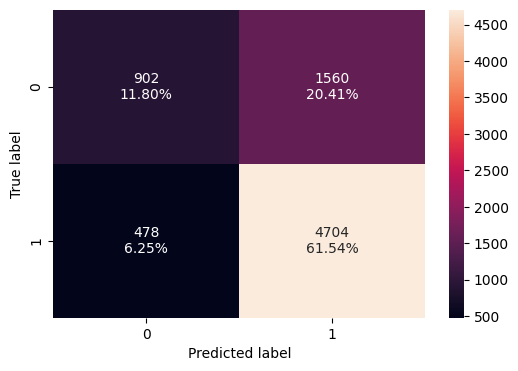

In [ ]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(rf_estimator, x_test,y_test)

In [ ]:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, x_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.725275  0.908837   0.737893  0.814492


In [ ]:
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, x_test, y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.733386  0.907758   0.750958  0.821947


- The Random Forest after tuning performs equally well on the training and testing datasets, indicating that the model is not overfit.
- Additionally, this model performs as well as two out of the three boosting models and the tuned Decision Tree on the test data.
- Both of these indicate this tuned model is a significant improvements over the base model.

###AdaBoost Classifier

In [ ]:
ab_classifier=AdaBoostClassifier(random_state=1)
ab_classifier.fit(x_train,y_train)

AdaBoostClassifier(random_state=1)

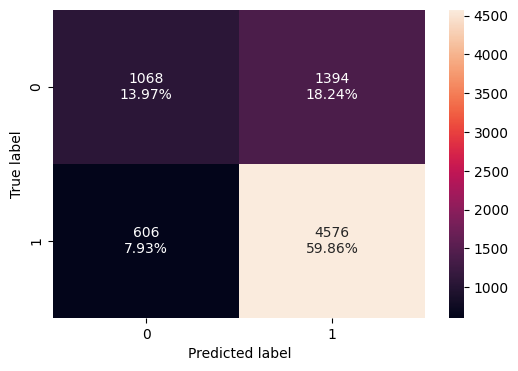

In [ ]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(ab_classifier, x_test,y_test)

In [ ]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier,x_train,y_train)
print("Training performance \n",ab_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.736208  0.884758   0.758126  0.816562


In [ ]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier,x_test,y_test)
print("Testing performance \n",ab_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision       F1
0  0.738357  0.883057   0.766499  0.82066


- This AdaBoost classifer performs equally well on the training and testing datasets, indicating that the model is not overfit.
- Additionally, the model performs the best of any model yet (i.e., highest F1 score) on the testing data.


###Tuning AdaBoost Classifier

Hyperparameters include:

- base_estimator: The base estimator from which the boosted ensemble is built. By default the base estimator is a decision tree with max_depth=1
- n_estimators: The maximum number of estimators at which boosting is terminated. Default value is 50.
- learning_rate: Learning rate shrinks the contribution of each classifier by - - learning_rate. There is a trade-off between learning_rate and n_estimators.

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1, class_weight='balanced'),
                      DecisionTreeClassifier(max_depth=2, random_state=1, class_weight='balanced'),
                      DecisionTreeClassifier(max_depth=3, random_state=1, class_weight='balanced')],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the randomized search
rand_abc = RandomizedSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5, n_jobs=-1, random_state=1)
rand_abc = rand_abc.fit(x_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = rand_abc.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.5, n_estimators=20, random_state=1)

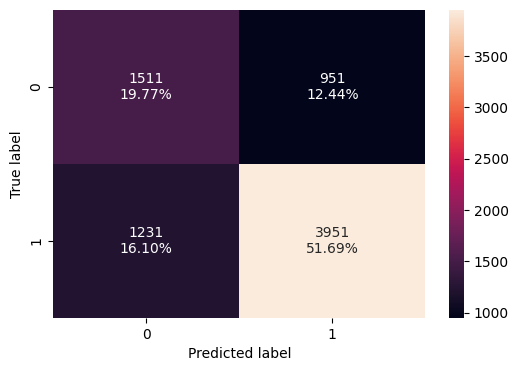

In [ ]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(abc_tuned, x_test,y_test)

In [ ]:
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned, x_train,y_train)
print("Training performance \n",abc_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.717425  0.759463   0.803881  0.781041


In [ ]:
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned, x_test, y_test)
print("Testing performance \n",abc_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.714547  0.762447   0.805998  0.783618


- The AdaBoost classifier after tuning performs equally well on the training and testing datasets, indicating that the model is not overfit.
- However, this model performs worse than the base model on both the train and test data.

###Gradient Boosting Classifier

In [ ]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(x_train,y_train)

GradientBoostingClassifier(random_state=1)

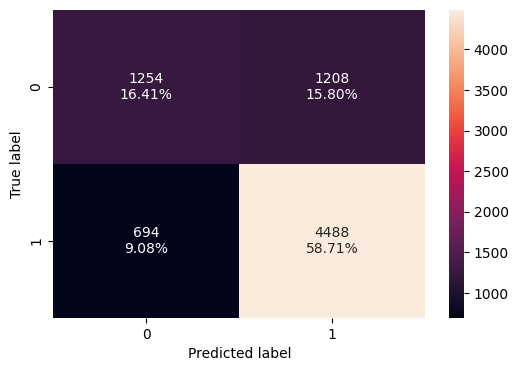

In [ ]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(gbc, x_test,y_test)

In [ ]:
gbc_classifier_model_train_perf = model_performance_classification_sklearn(gbc,x_train,y_train)
print("Training performance \n",gbc_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.753869  0.872761   0.781747  0.82475


In [ ]:
gbc_classifier_model_test_perf = model_performance_classification_sklearn(gbc,x_test,y_test)
print("Training performance \n",gbc_classifier_model_test_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.751177  0.866075   0.787921  0.825152


- This Gradient Boosting classifer performs equally well on the training and testing datasets, indicating that the model is not overfit.
- Additionally, this model performs even better than the AdaBoost model above.

### Feature Importance from GBC

In [ ]:
print(pd.DataFrame(gbc.feature_importances_, columns = ["Imp"],
                   index = x_train.columns).sort_values(by = 'Imp', ascending = False).head(10))

                                        Imp
education_of_employee_High School  0.276337
has_job_experience_Y               0.183587
prevailing_wage                    0.136507
education_of_employee_Master's     0.094788
education_of_employee_Doctorate    0.083761
continent_Europe                   0.061371
unit_of_wage_Year                  0.048247
region_of_employment_Midwest       0.025447
continent_North America            0.020986
region_of_employment_West          0.018542


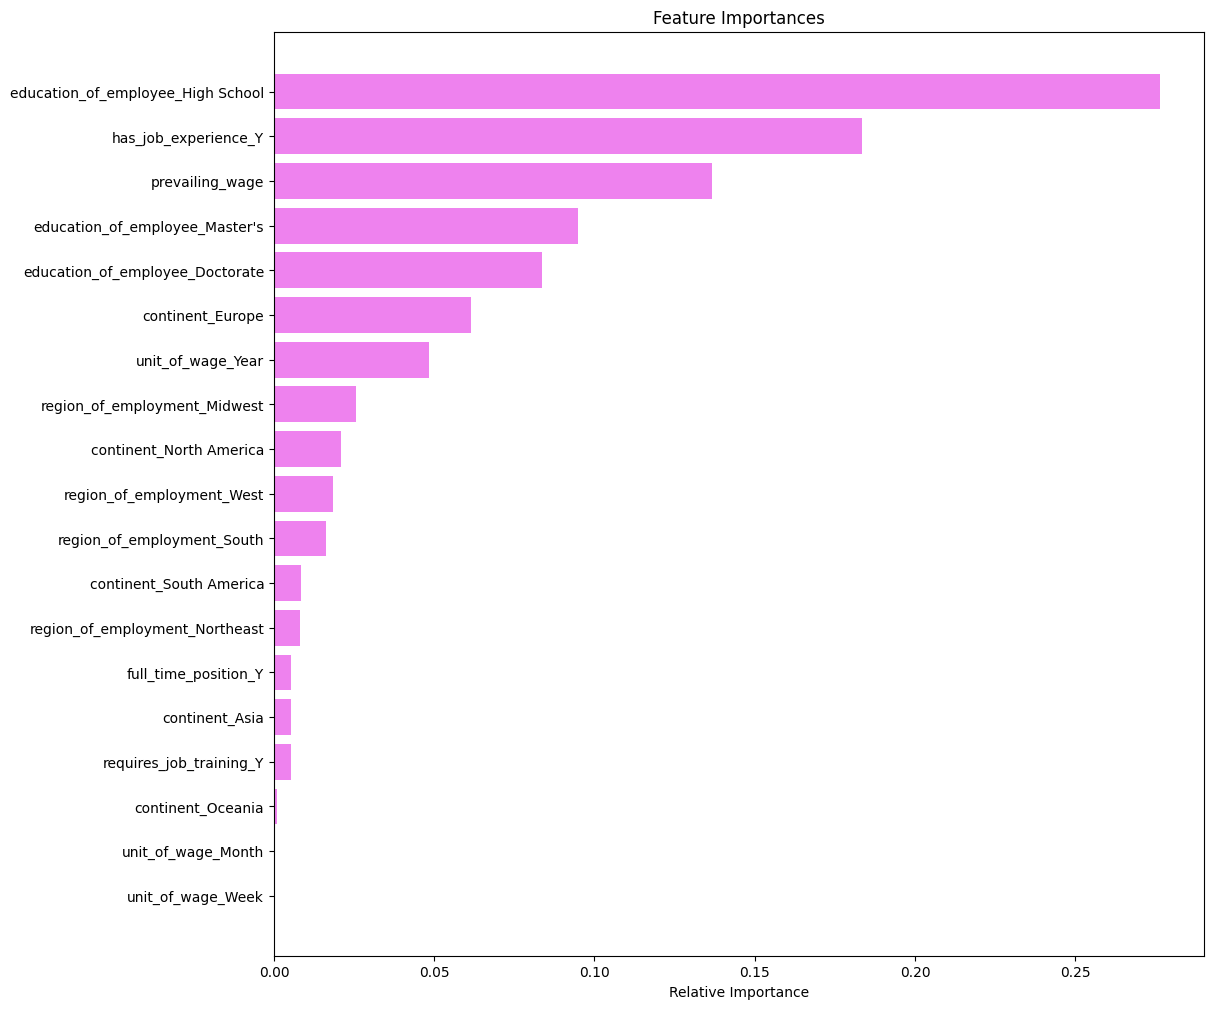

In [ ]:
feature_names = x_train.columns
importances = gbc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

###Tuning GradientBoost Classifier

Most of the hyperparameters available match those of a random forest classifier.

- init: An estimator object that is used to compute the initial predictions. If ‘zero’, the initial raw predictions are set to zero. By default, a - DummyEstimator predicting the classes priors is used.
- There is no class_weights parameter in gradient boosting.

In [ ]:
# Choose the type of classifier.
gb_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": [150,200,250,300],
              "subsample":[0.8,0.9,1],
              "max_features":[0.7,0.8,0.9,1],
              "learning_rate": np.arange(0.1, 0.4, 0.1)}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the randomized search
rand_gb = RandomizedSearchCV(gb_tuned, parameters, scoring=scorer,cv=5, n_jobs=-1, random_state=1)
rand_gb = rand_gb.fit(x_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = rand_gb.best_estimator_

# Fit the best algorithm to the data.
gb_tuned.fit(x_train, y_train)

GradientBoostingClassifier(max_features=0.7, n_estimators=300, random_state=1,
                           subsample=1)

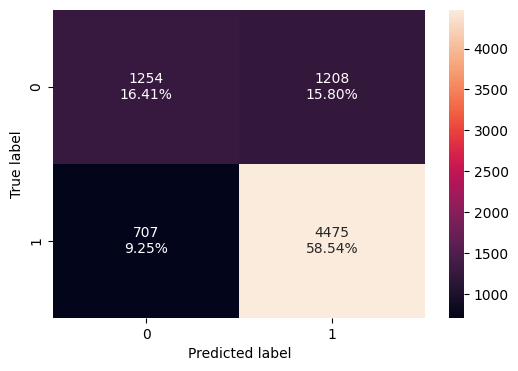

In [ ]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(gb_tuned, x_test,y_test)

In [ ]:
gb_tuned_model_train_perf=model_performance_classification_sklearn(rf_estimator, x_train,y_train)
print("Training performance \n",gb_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.725275  0.908837   0.737893  0.814492


In [ ]:
gb_tuned_model_test_perf=model_performance_classification_sklearn(rf_estimator, x_test, y_test)
print("Testing performance \n",gb_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.733386  0.907758   0.750958  0.821947


- The Gradient Boosting classifier after tuning performs equally well on the training and testing datasets, indicating that the model is not overfit.
- However, this model performs slightly worse than the base model on both the train and test data.

###XGBoost Classifier

In [ ]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

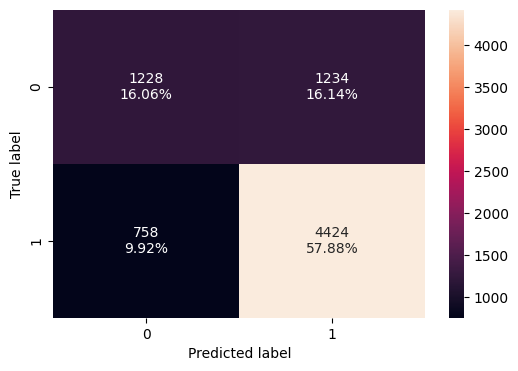

In [ ]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(xgb, x_test,y_test)

In [ ]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb,x_train,y_train)
print("Training performance \n",xgb_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.796984  0.899966   0.813813  0.854724


In [ ]:

xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb,x_test,y_test)
print("Testing performance \n",xgb_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.739403  0.853724   0.781902  0.816236


This XGBoost classifer performs equally well on the training and testing datasets, indicating that the model is not overfit.
Additionally, this model performs as well as the AdaBoost model and slightly worse the Gradient Boost model on the test data.

###Tuning XGB Classifer

Important parameters include:

- scale_pos_weight:Control the balance of positive and negative weights, useful for unbalanced classes. It has range from 0 to .
- subsample: Corresponds to the fraction of observations (the rows) to subsample at each step. By default it is set to 1 meaning that we use all rows.
- colsample_bytree: Corresponds to the fraction of features (the columns) to use.
- colsample_bylevel: The subsample ratio of columns for each level. Columns are subsampled from the set of columns chosen for the current tree.
- colsample_bynode: The subsample ratio of columns for each node (split). Columns are subsampled from the set of columns chosen for the current level.
- max_depth: is the maximum number of nodes allowed from the root to the farthest leaf of a tree.
learning_rate/eta: Makes the model more robust by shrinking the weights on each step.
- gamma: A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {"n_estimators": np.arange(10,100,20),
              "scale_pos_weight":[0,1,2,5],
              "subsample":[0.5,0.7,0.9,1],
              "learning_rate":[0.01,0.1,0.2,0.05],
              "gamma":[0,1,3],
              "colsample_bytree":[0.5,0.7,0.9,1],
              "colsample_bylevel":[0.5,0.7,0.9,1]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the randomized search
rand_xgb = RandomizedSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5, n_jobs=-1, random_state=1)
rand_xgb = rand_xgb.fit(x_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = rand_xgb.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=70,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

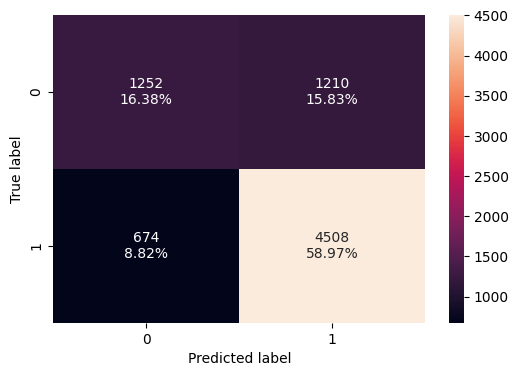

In [ ]:
confusion_matrix_sklearn(xgb_tuned, x_test,y_test)

In [ ]:
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned, x_train,y_train)
print("Training performance \n",xgb_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.760877  0.880112   0.785418  0.830073


In [ ]:
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned, x_test, y_test)
print("Testing performance \n",xgb_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.753532  0.869934   0.788388  0.827156


- The XGBoost classifier after tuning is less overfit than the base model, but performs equally well on the test data.
- This indicates a minor improvement over the base model.

### Feature Imprtances from XGB

In [ ]:
print(pd.DataFrame(xgb.feature_importances_, columns = ["Imp"],
                   index = x_train.columns).sort_values(by = 'Imp', ascending = False).head(10))

                                        Imp
education_of_employee_High School  0.217777
unit_of_wage_Year                  0.152720
education_of_employee_Doctorate    0.103561
has_job_experience_Y               0.080418
continent_Europe                   0.077738
region_of_employment_Midwest       0.050089
education_of_employee_Master's     0.045604
full_time_position_Y               0.038225
region_of_employment_South         0.033611
continent_North America            0.030021


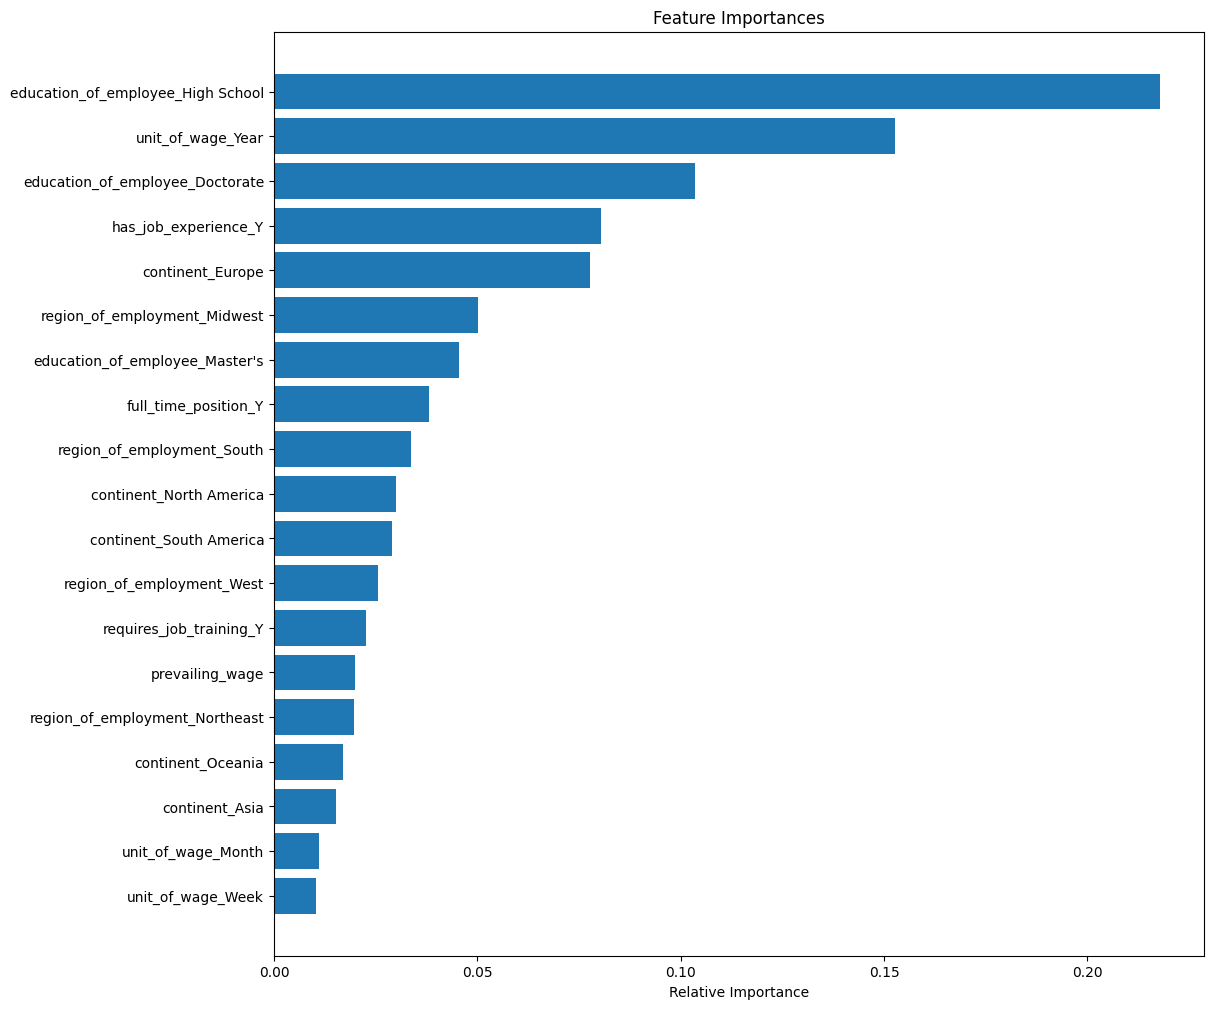

In [ ]:
feature_names = x_train.columns
importances = xgb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Model Performance Comparison and Conclusions

###Base models comparison

In [ ]:
# create a dataframe comparing the performance of the base models on the training data

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,
     bagging_model_train_perf.T,
     rf_model_train_perf.T,
     ab_classifier_model_train_perf.T,
     gbc_classifier_model_train_perf.T,
     xgb_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest",
    "AdaBoost Classifier",
    "Gradient Boosting Classifier",
    "XGBoost Classifier"]
print("Training performance comparison of base models:")
models_train_comp_df

Training performance comparison of base models:


,Decision Tree,Bagging Classifier,Random Forest,AdaBoost Classifier,Gradient Boosting Classifier,XGBoost Classifier
Accuracy,1.0,0.974153,0.999720,0.736208,0.753869,0.796984
Recall,1.0,0.976512,0.999831,0.884758,0.872761,0.899966
Precision,1.0,0.984414,0.999747,0.758126,0.781747,0.813813
F1,1.0,0.980447,0.999789,0.816562,0.824750,0.854724


In [ ]:
# create a dataframe comparing the performance of the base models on the testing data

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,
     bagging_model_test_perf.T,
     rf_model_test_perf.T,
     ab_classifier_model_test_perf.T,
     gbc_classifier_model_test_perf.T,
     xgb_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest",
    "AdaBoost Classifier",
    "Gradient Boosting Classifier",
    "XGBoost Classifier"]
print("Testing performance comparison of base models:")
models_test_comp_df

Testing performance comparison of base models:


,Decision Tree,Bagging Classifier,Random Forest,AdaBoost Classifier,Gradient Boosting Classifier,XGBoost Classifier
Accuracy,0.661041,0.674123,0.667452,0.738357,0.751177,0.739403
Recall,0.746044,0.749711,0.753570,0.883057,0.866075,0.853724
Precision,0.751994,0.764914,0.755319,0.766499,0.787921,0.781902
F1,0.749007,0.757236,0.754444,0.820660,0.825152,0.816236


- Overall, the Random Forest models perform best on the training data, due to all three of the models overfitting this data set.
- As shown above, all three of the boosting models do not overfit the data and achieve higher F1 scores on the training data set, with the Gradient Boosting classifier performing the best.

###Tuned models comparison

In [ ]:
# create a dataframe comparing the performance of the tuned models on the training data

tuned_models_train_comp_df = pd.concat(
    [dtree_estimator_model_train_perf.T,
     bagging_estimator_model_train_perf.T,
     rf_estimator_model_train_perf.T,
     abc_tuned_model_train_perf.T,
     gb_tuned_model_train_perf.T,
     xgb_tuned_model_train_perf.T],
    axis=1,
)
tuned_models_train_comp_df.columns = [
    "Tuned Decision Tree",
    "Tuned Bagging Classifier",
    "Tuned Random Forest",
    "Tuned AdaBoost Classifier",
    "Tuned Gradient Boosting Classifier",
    "Tuned XGBoost Classifier"]
print("Training performance comparison of tuned models:")
tuned_models_train_comp_df


Training performance comparison of tuned models:


,Tuned Decision Tree,Tuned Bagging Classifier,Tuned Random Forest,Tuned AdaBoost Classifier,Tuned Gradient Boosting Classifier,Tuned XGBoost Classifier
Accuracy,0.725275,0.663602,0.725275,0.717425,0.725275,0.760877
Recall,0.908837,1.000000,0.908837,0.759463,0.908837,0.880112
Precision,0.737893,0.663602,0.737893,0.803881,0.737893,0.785418
F1,0.814492,0.797789,0.814492,0.781041,0.814492,0.830073


In [ ]:
# create a dataframe comparing the performance of the tuned models on the testing data

tuned_models_test_comp_df = pd.concat(
    [dtree_estimator_model_test_perf.T,
     bagging_estimator_model_test_perf.T,
     rf_estimator_model_test_perf.T,
     abc_tuned_model_test_perf.T,
     gb_tuned_model_test_perf.T,
     xgb_tuned_model_test_perf.T],
    axis=1,
)
tuned_models_test_comp_df.columns = [
    "Tuned Decision Tree",
    "Tuned Bagging Classifier",
    "Tuned Random Forest",
    "Tuned AdaBoost Classifier",
    "Tuned Gradient Boosting Classifier",
    "Tuned XGBoost Classifier"]
print("Testing performance comparison of tuned models:")
tuned_models_test_comp_df

Testing performance comparison of tuned models:


,Tuned Decision Tree,Tuned Bagging Classifier,Tuned Random Forest,Tuned AdaBoost Classifier,Tuned Gradient Boosting Classifier,Tuned XGBoost Classifier
Accuracy,0.733386,0.677917,0.733386,0.714547,0.733386,0.753532
Recall,0.907758,1.000000,0.907758,0.762447,0.907758,0.869934
Precision,0.750958,0.677917,0.750958,0.805998,0.750958,0.788388
F1,0.821947,0.808046,0.821947,0.783618,0.821947,0.827156


In [ ]:
# create a dataframe comparing the performance all models on the training data
all_models_train_comp = pd.concat([models_train_comp_df,tuned_models_train_comp_df],axis=1)
all_models_train_comp.T.sort_values('F1',ascending=False)

,Accuracy,Recall,Precision,F1
Decision Tree,1.000000,1.000000,1.000000,1.000000
Random Forest,0.999720,0.999831,0.999747,0.999789
Bagging Classifier,0.974153,0.976512,0.984414,0.980447
XGBoost Classifier,0.796984,0.899966,0.813813,0.854724
Tuned XGBoost Classifier,0.760877,0.880112,0.785418,0.830073
Gradient Boosting Classifier,0.753869,0.872761,0.781747,0.824750
AdaBoost Classifier,0.736208,0.884758,0.758126,0.816562
Tuned Decision Tree,0.725275,0.908837,0.737893,0.814492
Tuned Random Forest,0.725275,0.908837,0.737893,0.814492
Tuned Gradient Boosting Classifier,0.725275,0.908837,0.737893,0.814492


In [ ]:
'The best performing model on the training data is the ' + all_models_train_comp.T.sort_values('F1',ascending=False).index[0]


'The best performing model on the training data is the Decision Tree'

###Visualization

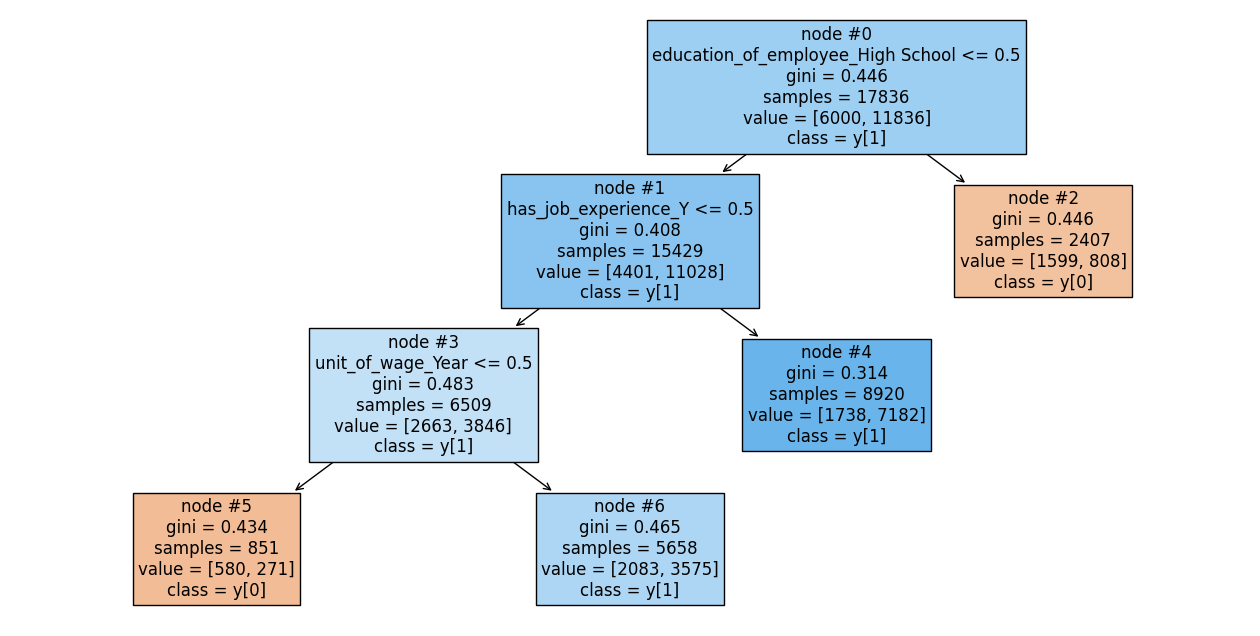

In [ ]:
#create visualization of tuned decision-tree model
feature_names = list(X.columns)
plt.figure(figsize=(16,8))
tree.plot_tree(dtree_estimator,feature_names=feature_names,filled=True,fontsize=12,node_ids=True,class_names=True)
plt.show()

## Actionable Insights and Recommendations

**Insights:**
For the Office of Foreign Labor Certification (OFLC), the three critical components for pre-screening an applicant are:

- Education Level: Applicants for jobs requiring a high school diploma are often denied, while those for positions needing a Master's degree or doctorate are more likely to be approved.
- Prior Job Experience: Applicants without prior experience are more likely to be denied compared to those with experience.
- Prevailing Wage: Higher prevailing wages correlate with increased approval rates, especially for hourly positions.


**Recommendations:**

To optimize resource allocation for application screening, OFLC should:

- Prioritize applications by education level, focusing on higher degrees first.
- Sort by prior job experience, reviewing experienced applicants first.
- Categorize jobs by hourly vs. annual wages, sorting each by prevailing wage, and review salaried positions from highest to lowest wage.

The Gradient Boosting classifier outperforms other models, but the tuned Decision-Tree model, while slightly less effective by F1 score, offers simplicity and clearer post-hoc explanations of decisions. OFLC should investigate why certification outcomes can be predicted by just three key factors. There appears to be bias against applications for less skilled, entry-level, and hourly positions.